# TEST
Historical file testing multiple functions to simulate ray tracing.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pathlib

PROJECT_ROOT = pathlib.Path().cwd().parent
sys.path.append(str(PROJECT_ROOT))

image_path = PROJECT_ROOT / 'ReMIND2Reg_dataset' / 'imagesTr'

from src.utils import *
from src.impedance import *
from src.datatype import MRIDataset, iUSDataset
from src.renderer import *
from src.cone import *
from src.impedance import ImpedanceEstimator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib


In [3]:
patient_id = "003" # between 000 and 102, t1 and t2 don't exist for all patients
iUS_file = f"ReMIND2Reg_0{patient_id}_0000.nii.gz"
t1_file = f"ReMIND2Reg_0{patient_id}_0001.nii.gz"
t2_file = f"ReMIND2Reg_0{patient_id}_0002.nii.gz"

# Load with nibabel; each img is a Nifti1Image object
us_img = nib.load(str(image_path / iUS_file))
t1_img = nib.load(str(image_path / t1_file))
t2_img = nib.load(str(image_path / t2_file))

# Extract data arrays (as NumPy) and affines
US_vol = us_img.get_fdata(dtype=np.float32)
US_affine = us_img.affine
T1_vol = t1_img.get_fdata(dtype=np.float32)
T1_affine = t1_img.affine
T2_vol = t2_img.get_fdata(dtype=np.float32)
T2_affine = t2_img.affine

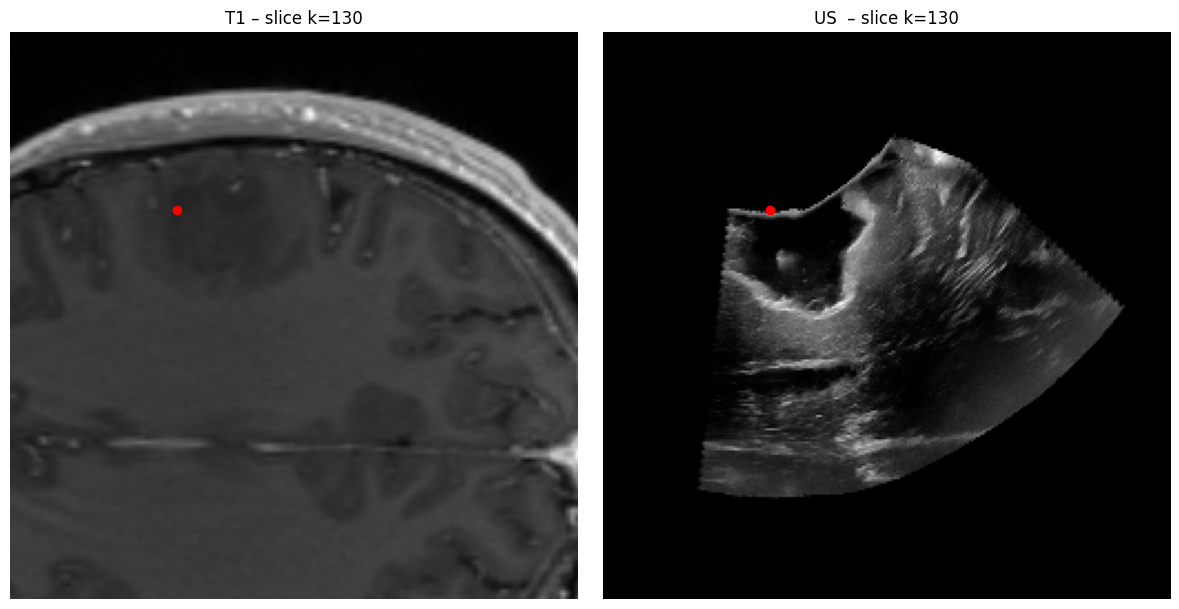

In [4]:
i_mri, j_mri, slice_idx = 175, 75, 130 # Example indices for T1 MRI
us_slice, us_idx = mri_to_us_point(i_mri, j_mri, slice_idx, T1_vol, T1_affine, US_vol, US_affine)
plot_mri_us_aligned(i_mri, j_mri, slice_idx, T1_vol, us_slice, us_idx)

In [69]:
UR = UltrasoundRenderer(300, 0.001)
source = torch.tensor([68,290,130])
directions = torch.tensor([[-0.1058, -0.9944,  0.0000],
                    [-0.0913, -0.9958,  0.0000],
                    [-0.0768, -0.9970,  0.0000],
                    [-0.0623, -0.9981,  0.0000],
                    [-0.0478, -0.9989,  0.0000],
                    [-0.0333, -0.9994,  0.0000],
                    [-0.0188, -0.9998,  0.0000],
                    [-0.0042, -1.0000,  0.0000],
                    [ 0.0103, -0.9999,  0.0000],
                    [ 0.0248, -0.9997,  0.0000],
                    [ 0.0394, -0.9992,  0.0000],
                    [ 0.0539, -0.9985,  0.0000],
                    [ 0.0684, -0.9977,  0.0000],
                    [ 0.0829, -0.9966,  0.0000],
                    [ 0.0974, -0.9952,  0.0000],
                    [ 0.1118, -0.9937,  0.0000],
                    [ 0.1263, -0.9920,  0.0000],
                    [ 0.1407, -0.9901,  0.0000],
                    [ 0.1550, -0.9879,  0.0000],
                    [ 0.1694, -0.9856,  0.0000],
                    [ 0.1837, -0.9830,  0.0000],
                    [ 0.1980, -0.9802,  0.0000],
                    [ 0.2122, -0.9772,  0.0000],
                    [ 0.2264, -0.9740,  0.0000],
                    [ 0.2405, -0.9707,  0.0000],
                    [ 0.2546, -0.9671,  0.0000],
                    [ 0.2686, -0.9632,  0.0000],
                    [ 0.2826, -0.9592,  0.0000],
                    [ 0.2965, -0.9550,  0.0000],
                    [ 0.3103, -0.9506,  0.0000],
                    [ 0.3241, -0.9460,  0.0000],
                    [ 0.3378, -0.9412,  0.0000],
                    [ 0.3515, -0.9362,  0.0000],
                    [ 0.3651, -0.9310,  0.0000],
                    [ 0.3786, -0.9256,  0.0000],
                    [ 0.3920, -0.9200,  0.0000],
                    [ 0.4053, -0.9142,  0.0000],
                    [ 0.4185, -0.9082,  0.0000],
                    [ 0.4317, -0.9020,  0.0000],
                    [ 0.4448, -0.8956,  0.0000],
                    [ 0.4577, -0.8891,  0.0000],
                    [ 0.4706, -0.8823,  0.0000],
                    [ 0.4834, -0.8754,  0.0000],
                    [ 0.4961, -0.8683,  0.0000],
                    [ 0.5086, -0.8610,  0.0000],
                    [ 0.5211, -0.8535,  0.0000],
                    [ 0.5334, -0.8458,  0.0000],
                    [ 0.5457, -0.8380,  0.0000],
                    [ 0.5578, -0.8300,  0.0000],
                    [ 0.5698, -0.8218,  0.0000],
                    [ 0.5817, -0.8134,  0.0000],
                    [ 0.5935, -0.8049,  0.0000],
                    [ 0.6051, -0.7962,  0.0000],
                    [ 0.6166, -0.7873,  0.0000],
                    [ 0.6280, -0.7782,  0.0000],
                    [ 0.6392, -0.7690,  0.0000],
                    [ 0.6503, -0.7596,  0.0000],
                    [ 0.6613, -0.7501,  0.0000],
                    [ 0.6721, -0.7404,  0.0000],
                    [ 0.6828, -0.7306,  0.0000],
                    [ 0.6934, -0.7206,  0.0000],
                    [ 0.7038, -0.7104,  0.0000],
                    [ 0.7140, -0.7001,  0.0000],
                    [ 0.7241, -0.6897,  0.0000]])

tensor([[-0.1058,  0.0000, -0.9944],
        [-0.0913,  0.0000, -0.9958],
        [-0.0768,  0.0000, -0.9970],
        [-0.0623,  0.0000, -0.9981],
        [-0.0478,  0.0000, -0.9989],
        [-0.0333,  0.0000, -0.9994],
        [-0.0188,  0.0000, -0.9998],
        [-0.0042,  0.0000, -1.0000],
        [ 0.0103,  0.0000, -0.9999],
        [ 0.0248,  0.0000, -0.9997],
        [ 0.0394,  0.0000, -0.9992],
        [ 0.0539,  0.0000, -0.9985],
        [ 0.0684,  0.0000, -0.9977],
        [ 0.0829,  0.0000, -0.9966],
        [ 0.0974,  0.0000, -0.9952],
        [ 0.1118,  0.0000, -0.9937],
        [ 0.1263,  0.0000, -0.9920],
        [ 0.1407,  0.0000, -0.9901],
        [ 0.1550,  0.0000, -0.9879],
        [ 0.1694,  0.0000, -0.9856],
        [ 0.1837,  0.0000, -0.9830],
        [ 0.1980,  0.0000, -0.9802],
        [ 0.2122,  0.0000, -0.9772],
        [ 0.2264,  0.0000, -0.9740],
        [ 0.2405,  0.0000, -0.9707],
        [ 0.2546,  0.0000, -0.9671],
        [ 0.2686,  0.0000, -0.9632],
 

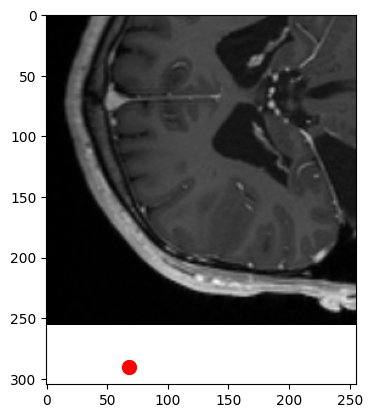

In [70]:
plt.imshow(T1_vol[:, slice_idx, :], cmap='gray')
source_2 = torch.Tensor([68, 130, 290])
plt.scatter(source_2[0], source_2[2], c='r', s=100, label='Source Point')
# Swap the second and third columns of directions
directions_2 = directions.clone()
directions_2[:, [1, 2]] = directions_2[:, [2, 1]]
directions_2

[INFO] Tracing rays with source: tensor([ 68., 130., 290.]) and directions shape: torch.Size([64, 1, 3])


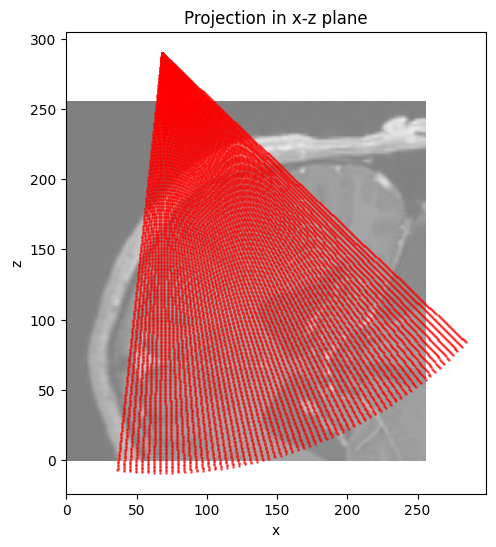

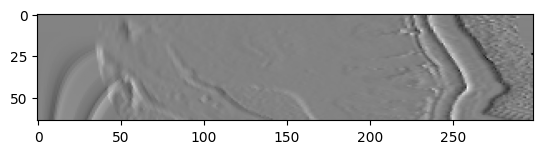

[INFO] Tracing rays with source: tensor([ 68., 130., 290.]) and directions shape: torch.Size([64, 1, 3])


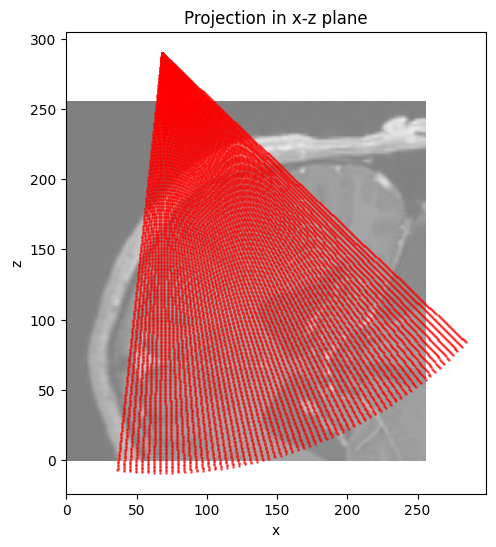

Intensity range: 0.0000 to 0.6105


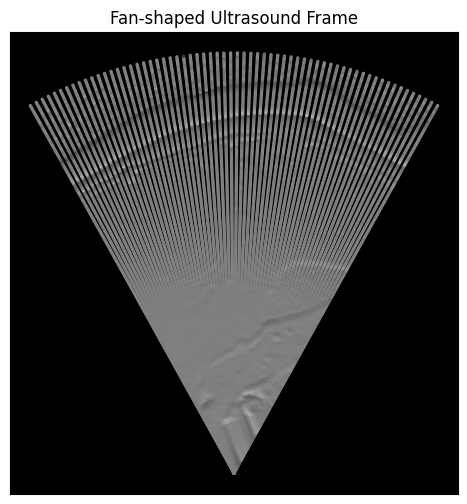

In [72]:
rays = UR.simulate_rays(volume=torch.tensor(T1_vol),
                   source=source_2, 
                   directions=directions_2,
)
plt.show()
plt.imshow(rays.cpu().numpy(), cmap='gray')
plt.show()
_, ax =  UR.plot_beam_frame(volume=torch.tensor(T1_vol),
                  source=source_2, 
                  directions=directions_2,
                  angle=29,
                  start=0
)

ax.set_clim(-1,1)